## Problem Statement


You are a data scientist at a management consulting firm specializing in workplace efficiency and employee productivity. You have been provided with a dataset named **"employees_work_hours_data.csv"**, containing detailed records of employees’ work hours and related attributes in a corporate setting. The dataset includes the following columns:

- **employee_id:** A unique identifier for each employee.
- **department:** The department where the employee works (e.g., Sales, IT, HR).
- **remote_working:** Indicates whether the employee is working remotely (Yes/No).
- **hours_worked_per_day:** The average number of hours the employee works per day.

**Import Necessary Libraries**

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

### Task1: Importing and Examining the Dataset

1. Import the data from the "employees_work_hours_data.csv" file.
2. display the number of rows and columns. 
3. Display the first few rows of the dataset to get an overview.


In [3]:
df = pd.read_csv("employees_work_hours_data.csv")

print(df.shape)
df.head()

(2800, 4)


,employee_id,department,remote_working,hours_worked_per_day
0,E0001,HR,No,10.1
1,E0002,HR,No,8.5
2,E0003,IT,Yes,9.2
3,E0004,Marketing,No,10.7
4,E0005,Marketing,Yes,10.2


### Task2: Statistical Measures of Work Hours

Compute fundamental statistical measures for the 'hours_worked_per_day' column.
- **Calculate the Mean**: Average number of hours worked per day by the employees.
- **Compute the Standard Deviation**: The amount of variation or dispersion in the daily work hours.

In [10]:
avg_hours_worked_per_day = round(df["hours_worked_per_day"].mean(),1)
hours_worked_per_day_st_dev = round(df["hours_worked_per_day"].std(),1)

avg_hours_worked_per_day, hours_worked_per_day_st_dev

(8.0, 1.3)

### Task3: Calculating Z-Scores for Outlier Detection

- **Compute Z-Scores:** For each entry in the 'hours_worked_per_day' column, calculate its Z-score. The Z-score represents how many standard deviations a value is from the mean, which is crucial for identifying outliers.

In [15]:
df["hrs_worked_z_score"] = (df["hours_worked_per_day"]-avg_hours_worked_per_day)/hours_worked_per_day_st_dev

df.head()

,employee_id,department,remote_working,hours_worked_per_day,hrs_worked_z_score
0,E0001,HR,No,10.1,1.615385
1,E0002,HR,No,8.5,0.384615
2,E0003,IT,Yes,9.2,0.923077
3,E0004,Marketing,No,10.7,2.076923
4,E0005,Marketing,Yes,10.2,1.692308


### Task4: Removing Outliers Based on Z-Scores

- Identify and exclude rows where the 'hours_worked_per_day' Z-score is less than -3 or greater than +3, thus removing outliers from the dataset.

In [26]:
#identify outliers

df_outliers = df[(df.hrs_worked_z_score<-3) | (df.hrs_worked_z_score>3)]
# print(df_outliers.shape)
# df_outliers

#exclude outliers

df_no_outliers = df[(df.hrs_worked_z_score>-3) & (df.hrs_worked_z_score<3)]
print(df_no_outliers.shape)

(2772, 5)


### Task5: Standard Normal Distribution Post-Outlier Removal

-  Construct a visual plot of the Standard Normal Distribution using the Z-scores from the 'hours_worked_per_day' data, ensuring to include only the data after outlier removal. 

<Axes: xlabel='hrs_worked_z_score', ylabel='Count'>

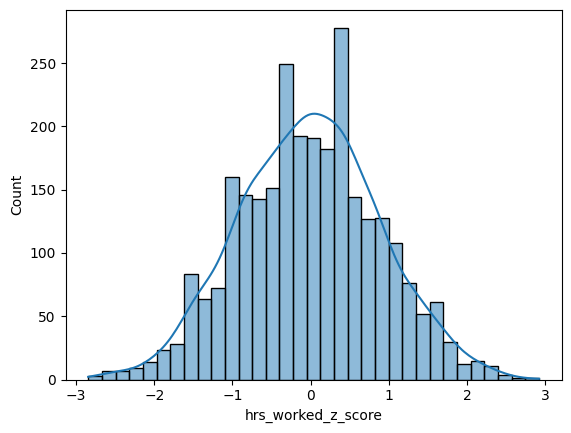

In [25]:
sns.histplot(df_no_outliers["hrs_worked_z_score"],kde=True)